In [2]:
import pandas as pd
import re, os
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("DataFolder/DS0003/38492-0003-Data.tsv", sep='\t')

/var/folders/_5/45mz9cws6zxd_jy3gg1nyx180000gn/T/ipykernel_11380/3092434541.py:6: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("DataFolder/DS0003/38492-0003-Data.tsv", sep='\t')


In [10]:
# remove unknown education levels
df = df[df.EDUCATION != 9]
# remove unkown and other prison admission types
df = df[df.ADMTYPE != 9]
df = df[df.ADMTYPE != 3]
# remove unkonwn general offense categories
df = df[df.OFFGENERAL != 9]
# remove year of mandatory prison release column
df = df.drop(columns=['MAND_PRISREL_YEAR'])
# remove year of projected prison release column
df = df.drop(columns=['PROJ_PRISREL_YEAR'])
# remove year of parole eligibility column
df = df.drop(columns=['PARELIG_YEAR'])
# remove unknown admission year datapoints
df = df[df.ADMITYR != 9999]
# remove unknown maximum sentence length datapoints
df = df[df.SENTLGTH != 9]
# remove unknown offense detail datapoints
df = df[df.OFFDETAIL != 99]
# remove unknown race datapoints
df = df[df.RACE != 9]
# remove unknown age at admission datapoints 
df = df[df.AGEADMIT != 9]
# remove unknown release year datapoints
df = df[df.RELYR != 9999]
# remove unknown and other release type datapoints
df = df[df.RELTYPE != 9]
df = df[df.RELTYPE != 3]
# remove unknown age at release datapoints
df = df[df.AGERLSE != 0]
# remove TIMESRVD_REL 
df = df.drop(columns=['TIMESRVD_REL'])
# df = df[df.TIMESRVD_REL != 9]
# create a new column of TIMESRVD where value is the RELYR - ADMITYR
df['TIMESRVD'] = df['RELYR'] - df['ADMITYR']

print(df)


          SEX  RPTYEAR  STATE  EDUCATION  ADMTYPE  OFFGENERAL  ADMITYR  \
0           1     1991      1          3        1           1     1983   
1           1     1991      1          2        1           1     1987   
3           1     1991      1          2        1           2     1989   
5           2     1991      1          1        1           3     1991   
6           1     1991      1          1        1           2     1991   
...       ...      ...    ...        ...      ...         ...      ...   
17075799    1     2020     56          3        1           1     2003   
17075800    1     2020     56          2        1           3     2018   
17075801    1     2020     56          1        1           1     2018   
17075802    1     2020     56          1        1           2     2018   
17075803    1     2020     56          1        1           1     2017   

         SENTLGTH  OFFDETAIL  RACE  AGEADMIT  RELYR  RELTYPE  AGERLSE  \
0               5          1     1    

Accuracy: 0.3703464565907218


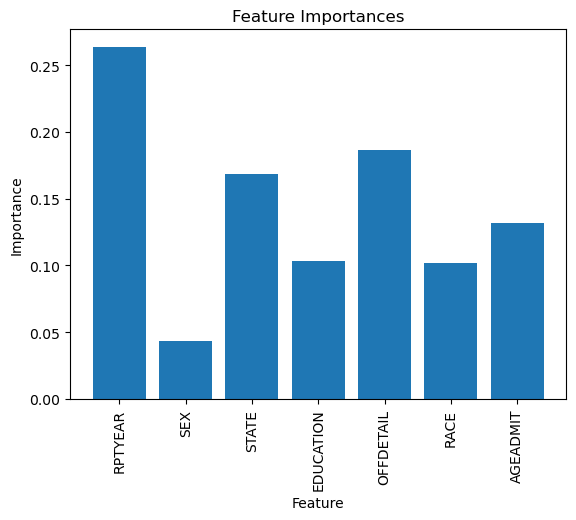

In [39]:
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


feature_cols = ['RPTYEAR','SEX', 'STATE', 'EDUCATION', 'OFFDETAIL', 'RACE', 'AGEADMIT']

X = df[feature_cols] # Features
y = df.TIMESRVD # Target variable

# split dataset into training set and test set
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)


print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

importances = clf.feature_importances_

# get feature names
# feature_names = list(X)

# create a bar plot of feature importances
plt.bar(feature_cols, importances)
plt.xticks(rotation=90)
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.title('Feature Importances')
plt.show()


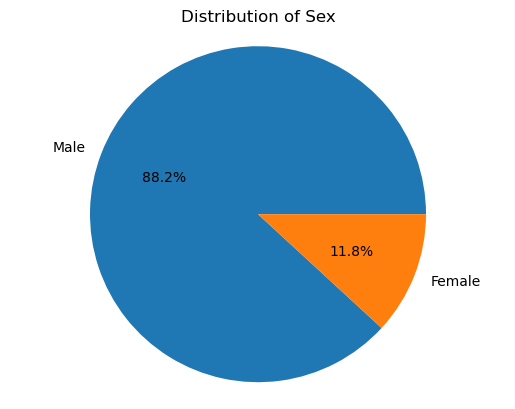

In [21]:
sex_col = df['SEX']

# Get the value counts of the sex column
mapping = {
        1: 'Male',
        2: 'Female',
    }
sexStringCol = df['SEX'].map(mapping)
sex_counts = sexStringCol.value_counts(sort=False)
# Create a pie chart using matplotlib
plt.pie(sex_counts, labels=sexStringCol.unique(), autopct='%1.1f%%')
plt.title('Distribution of Sex')
plt.axis('equal')
plt.show()

# this isn't biased data, it's just the way men and women are distributed
# in the prison system. It says more about the prison suystem than the data

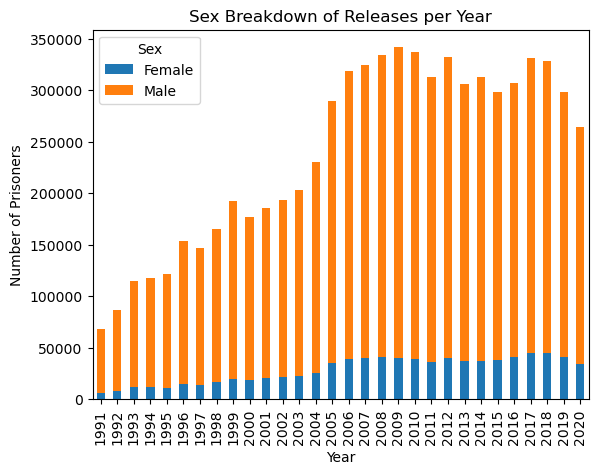

In [91]:
grouped = df.groupby(['RPTYEAR', 'SEX']).size().unstack(fill_value=0)

mapping = {
        1: 'Male',
        2: 'Female',
    }

df['Sex'] = df['SEX'].map(mapping)

# Group the data by year and race
grouped = df.groupby(['RPTYEAR', 'Sex']).size().unstack(fill_value=0)

# Plot a stacked bar graph
grouped.plot(kind='bar', stacked=True)

# Set the labels and title
# plt.figure(figsize=(8,8))
plt.xlabel('Year')
plt.ylabel('Number of Prisoners')
plt.title('Sex Breakdown of Releases per Year')

# Show the graph
plt.show()


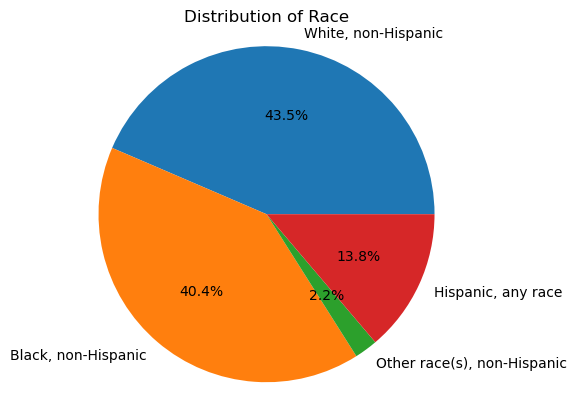

In [92]:
race_col = df['RACE']
# # Get the value counts of the sex column
# race_counts = race_col.value_counts(sort=False)
# print(race_counts)

mapping = {
        1: 'White, non-Hispanic',
        2: 'Black, non-Hispanic',
        3: 'Hispanic, any race',
        4: 'Other race(s), non-Hispanic'
    }
raceStringCol = df['RACE'].map(mapping)
race_counts = raceStringCol.value_counts(sort=False)
# print(race_counts)

# Create a pie chart using matplotlib
plt.pie(race_counts, labels=raceStringCol.unique(), autopct='%1.1f%%')
plt.title('Distribution of Race')
plt.axis('equal')
plt.show()

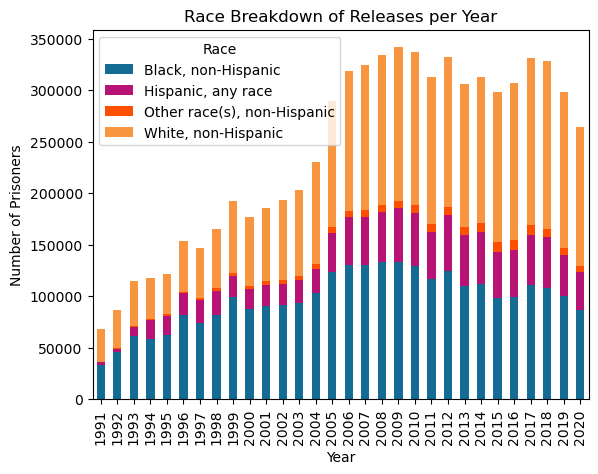

In [106]:
grouped = df.groupby(['RPTYEAR', 'RACE']).size().unstack(fill_value=0)

mapping = {
        1: 'White, non-Hispanic',
        2: 'Black, non-Hispanic',
        3: 'Hispanic, any race',
        4: 'Other race(s), non-Hispanic'
    }

df['Race'] = df['RACE'].map(mapping)

# Group the data by year and race
grouped = df.groupby(['RPTYEAR', 'Race']).size().unstack(fill_value=0)

# Plot a stacked bar graph
colors = ["#146C94", "#B71375", "#FC4F00", "#F79540"]
grouped.plot(kind='bar', stacked=True, color=colors)
# grouped.plot(kind='bar', stacked=True)


# Set the labels and title
# plt.figure(figsize=(8,8))
plt.xlabel('Year')
plt.ylabel('Number of Prisoners')
plt.title('Race Breakdown of Releases per Year')

# Show the graph
plt.show()


25-34 years    2603952
35-44 years    1769329
18-24 years    1770061
45-54 years     828475
55+ years       219654
Name: AGEADMIT, dtype: int64


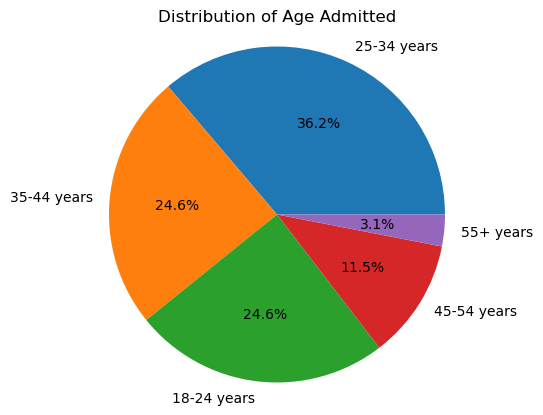

In [107]:
age_col = df['AGEADMIT']
# Get the value counts of the sex column
mapping = {
        1: '18-24 years',
        2: '25-34 years',
        3: '35-44 years',
        4: '45-54 years',
        5: '55+ years'
    }
ageStringCol = df['AGEADMIT'].map(mapping)
age_counts = ageStringCol.value_counts(sort=False)
print(age_counts)

# Create a pie chart using matplotlib
plt.pie(age_counts, labels=ageStringCol.unique(), autopct='%1.1f%%')
plt.title('Distribution of Age Admitted')
plt.axis('equal')
plt.show()

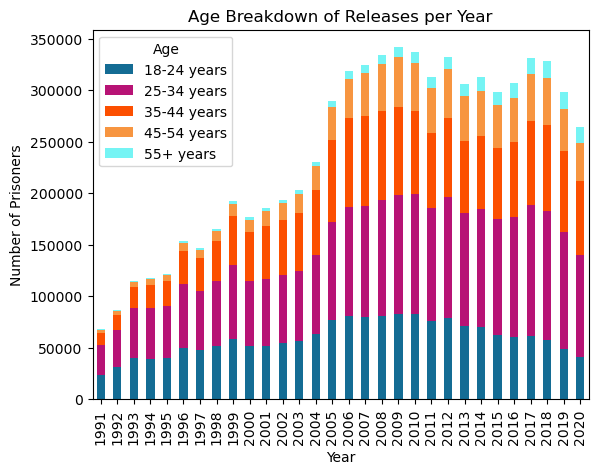

In [108]:
grouped = df.groupby(['RPTYEAR', 'AGEADMIT']).size().unstack(fill_value=0)

mapping = {
        1: '18-24 years',
        2: '25-34 years',
        3: '35-44 years',
        4: '45-54 years',
        5: '55+ years'
    }

# colors = ['#2c2a4a', '#4f518c', '#907ad6', '#dabfff']

df['Age'] = df['AGEADMIT'].map(mapping)

# Group the data by year and race
grouped = df.groupby(['RPTYEAR', 'Age']).size().unstack(fill_value=0)

# Plot a stacked bar graph
colors = ["#146C94", "#B71375", "#FC4F00", "#F79540", "#75F4F4"]
grouped.plot(kind='bar', stacked=True, color = colors)

# Set the labels and title
# plt.figure(figsize=(8,8))
plt.xlabel('Year')
plt.ylabel('Number of Prisoners')
plt.title('Age Breakdown of Releases per Year')

# Show the graph
plt.show()


Any college         554771
HS diploma/GE      3086558
<HS diploma/GED    3550142
Name: EDUCATION, dtype: int64


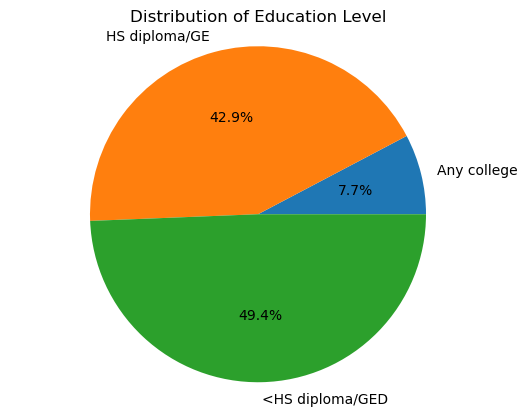

In [29]:
edu_col = df['EDUCATION']
# Get the value counts of the sex column
mapping = {
        1: '<HS diploma/GED',
        2: 'HS diploma/GE', 
        3: 'Any college'
    }
eduStringCol = df['EDUCATION'].map(mapping)
edu_counts = eduStringCol.value_counts(sort=False)
print(edu_counts)

# Create a pie chart using matplotlib
plt.pie(edu_counts, labels=eduStringCol.unique(), autopct='%1.1f%%')
plt.title('Distribution of Education Level')
plt.axis('equal')
plt.show()

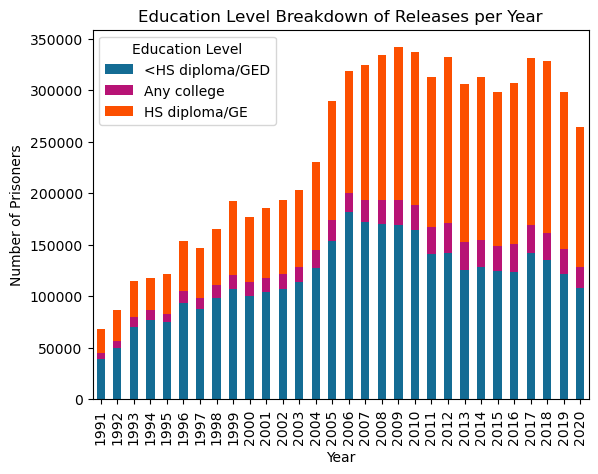

In [109]:
grouped = df.groupby(['RPTYEAR', 'EDUCATION']).size().unstack(fill_value=0)

mapping = {
        1: '<HS diploma/GED',
        2: 'HS diploma/GE', 
        3: 'Any college'
    }

# colors = ['#2c2a4a', '#4f518c', '#907ad6', '#dabfff']

df['Education Level'] = df['EDUCATION'].map(mapping)

# Group the data by year and race
grouped = df.groupby(['RPTYEAR', 'Education Level']).size().unstack(fill_value=0)

# Plot a stacked bar graph
colors = ["#146C94", "#B71375", "#FC4F00"]
grouped.plot(kind='bar', stacked=True, color = colors)

# Set the labels and title
# plt.figure(figsize=(8,8))
plt.xlabel('Year')
plt.ylabel('Number of Prisoners')
plt.title('Education Level Breakdown of Releases per Year')

# Show the graph
plt.show()


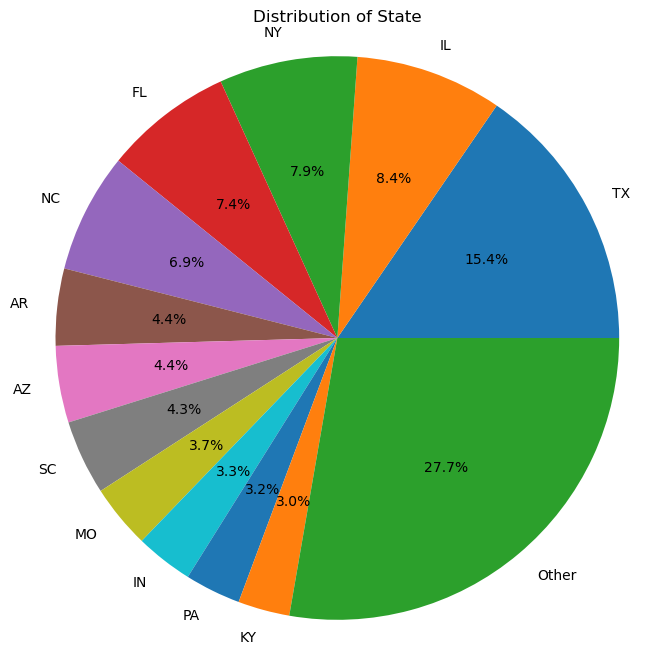

In [84]:
states_col = df['STATE']

mapping = {
    1: 'AL',
    2: 'AK',
    4: 'AZ',
    5: 'AR',
    6: 'CA',
    8: 'CO',
    9: 'CT',
    10: 'DE',
    11: 'DC',
    12: 'FL',
    13: 'GA',
    15: 'HI',
    16: 'ID',
    17: 'IL',
    18: 'IN',
    19: 'IA',
    20: 'KS',
    21: 'KY',
    22: 'LA',
    23: 'ME',
    24: 'MD',
    25: 'MA',
    26: 'MI',
    27: 'MN',
    28: 'MS',
    29: 'MO',
    30: 'MT',
    31: 'NE',
    32: 'NV',
    33: 'NH',
    34: 'NJ',
    35: 'NM',
    36: 'NY',
    37: 'NC',
    38: 'ND',
    39: 'OH',
    40: 'OK',
    41: 'OR',
    42: 'PA',
    44: 'RI',
    45: 'SC',
    46: 'SD',
    47: 'TN',
    48: 'TX',
    49: 'UT',
    50: 'VT',
    51: 'VA',
    53: 'WA',
    54: 'WV',
    55: 'WI',
    56: 'WY'
}

stateStringCol = df['STATE'].map(mapping)

state_counts = stateStringCol.value_counts(sort=True, ascending=False)
# creating a list of state labels in the same order as the sorted state counts
sortedMapping = state_counts.to_dict()
sortedMapping = dict(sorted(sortedMapping.items(), key=lambda x: -x[1]))
sortedLabels = list(sortedMapping.keys())

# combining all the states below the top twelve into one slice
n = 12
top_states = sortedLabels[:n]

# Get the sum of the values of the removed states
other_states_count = state_counts.loc[~state_counts.index.isin(top_states)].sum()

# Combine the removed states into a single slice
labels = list(top_states) + ['Other']
values = list(state_counts[top_states]) + [other_states_count]

# Create a pie chart using matplotlib
plt.figure(figsize=(8,8))
plt.pie(values, labels=labels, autopct='%1.1f%%')
# plt.pie(state_counts, labels=sortedLabels, autopct='%1.1f%%')
# plt.pie(state_counts, labels=sorted_labels, autopct='%1.1f%%')

plt.title('Distribution of State')
plt.axis('equal')
plt.show()


# THIS ONE DOESN'T MATCH UP WITH THE COLOR MAP

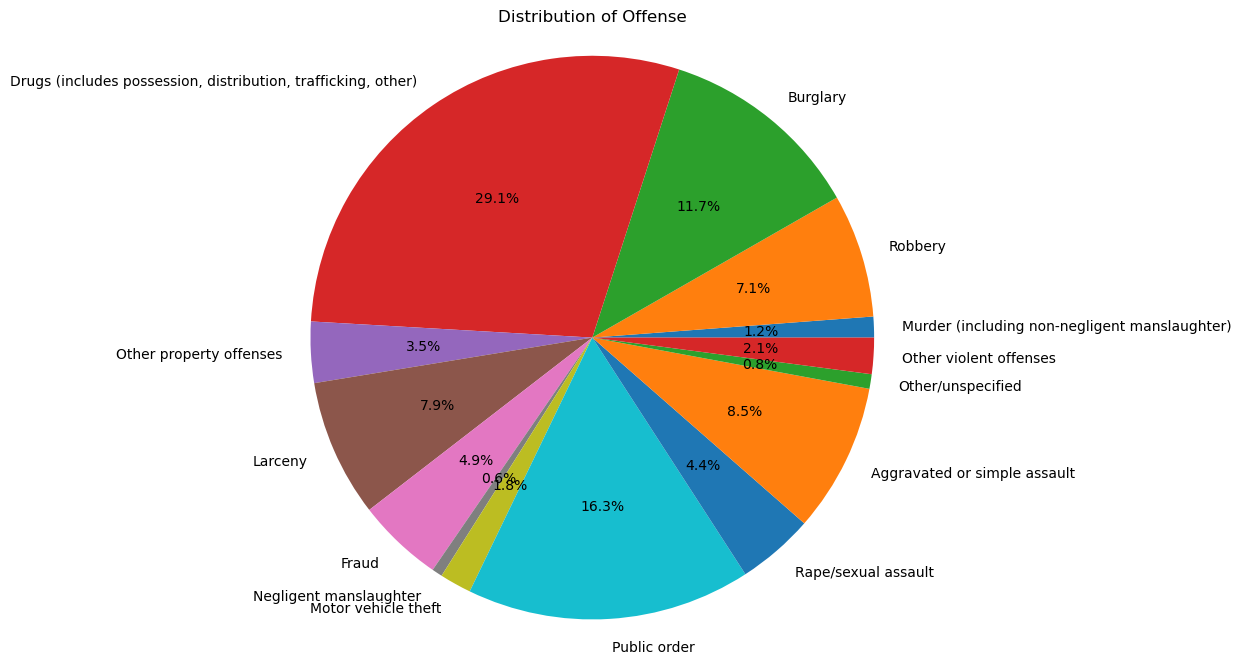

In [37]:
off_col = df['OFFDETAIL']
# Get the value counts of the sex column

mapping = {
    1: 'Murder (including non-negligent manslaughter)',
    2: 'Negligent manslaughter',
    3: 'Rape/sexual assault',
    4: 'Robbery',
    5: 'Aggravated or simple assault',
    6: 'Other violent offenses',
    7: 'Burglary',
    8: 'Larceny',
    9: 'Motor vehicle theft',
    10: 'Fraud',
    11: 'Other property offenses',
    12: 'Drugs (includes possession, distribution, trafficking, other)',
    13: 'Public order',
    14: 'Other/unspecified'
}

offStringCol = df['OFFDETAIL'].map(mapping)
off_counts = offStringCol.value_counts(sort=False)


# Create a pie chart using matplotlib
plt.figure(figsize=(8,8))
plt.pie(off_counts, labels=offStringCol.unique(), autopct='%1.1f%%')
plt.title('Distribution of Offense')
plt.axis('equal')
plt.show()

<Figure size 1200x1200 with 0 Axes>

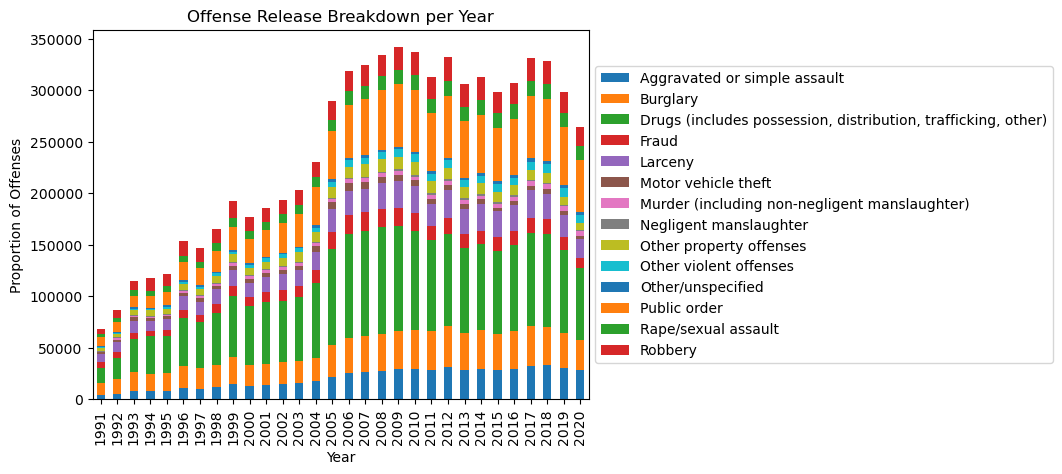

In [81]:
grouped = df.groupby(['RPTYEAR', 'OFFDETAIL']).size().unstack(fill_value=0)

mapping = {
    1: 'Murder (including non-negligent manslaughter)',
    2: 'Negligent manslaughter',
    3: 'Rape/sexual assault',
    4: 'Robbery',
    5: 'Aggravated or simple assault',
    6: 'Other violent offenses',
    7: 'Burglary',
    8: 'Larceny',
    9: 'Motor vehicle theft',
    10: 'Fraud',
    11: 'Other property offenses',
    12: 'Drugs (includes possession, distribution, trafficking, other)',
    13: 'Public order',
    14: 'Other/unspecified'
}

# colors = ['#2c2a4a', '#4f518c', '#907ad6', '#dabfff']

df['offense'] = df['OFFDETAIL'].map(mapping)


# Group the data by year and race
grouped = df.groupby(['RPTYEAR', 'offense']).size().unstack(fill_value=0)

# # Compute the proportion of each race per year
# proportions = grouped.div(grouped.sum(axis=1), axis=0)

plt.figure(figsize=(12,12))
# Plot a stacked bar graph of the proportions
# colors = ['#2c2a4a', '#4f518c', '#907ad6', '#dabfff']
# proportions.plot(kind='bar', stacked=True, color=colors)
grouped.plot(kind='bar', stacked=True)


# Set the labels and title

plt.xlabel('Year')
plt.ylabel('Proportion of Offenses')
plt.title('Offense Release Breakdown per Year')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the graph
plt.show()

**OTHER VARIATIONS**

**OTHER VARIATIONS**

**OTHER VARIATIONS**

**OTHER VARIATIONS**

**OTHER VARIATIONS**

**OTHER VARIATIONS**

<Figure size 1200x1200 with 0 Axes>

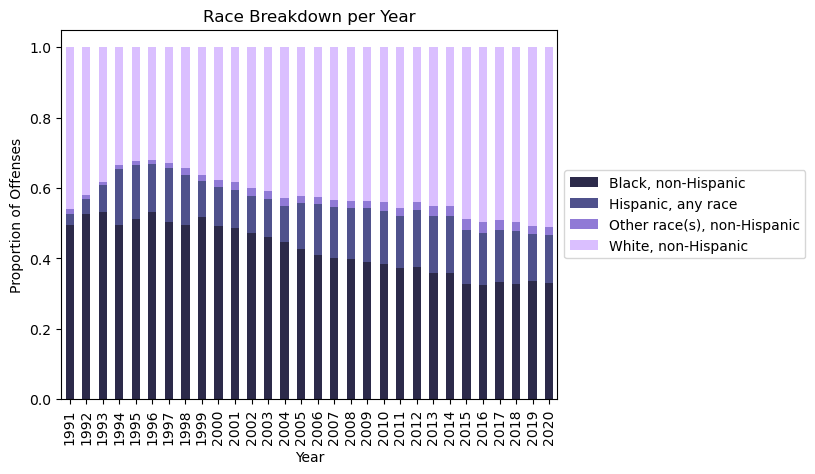

In [57]:
# Group the data by year and race
grouped = df.groupby(['RPTYEAR', 'Race']).size().unstack(fill_value=0)

# Compute the proportion of each race per year
proportions = grouped.div(grouped.sum(axis=1), axis=0)

plt.figure(figsize=(12,12))
# Plot a stacked bar graph of the proportions
colors = ['#2c2a4a', '#4f518c', '#907ad6', '#dabfff']
proportions.plot(kind='bar', stacked=True, color=colors)

# Set the labels and title

plt.xlabel('Year')
plt.ylabel('Proportion of Offenses')
plt.title('Race Breakdown per Year')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the graph
plt.show()

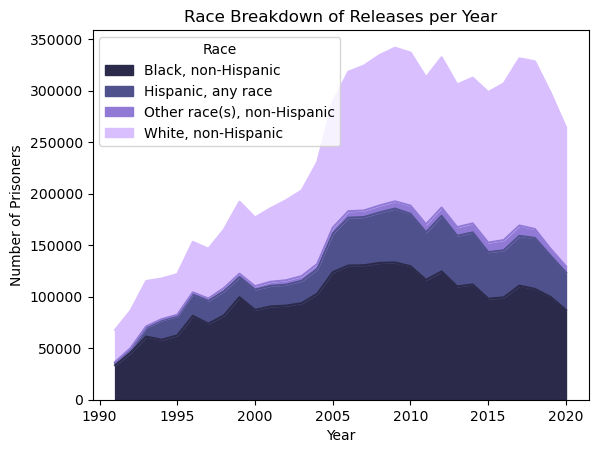

In [58]:
grouped = df.groupby(['RPTYEAR', 'RACE']).size().unstack(fill_value=0)

mapping = {
        1: 'White, non-Hispanic',
        2: 'Black, non-Hispanic',
        3: 'Hispanic, any race',
        4: 'Other race(s), non-Hispanic'
    }

df['Race'] = df['RACE'].map(mapping)

# Group the data by year and race
grouped = df.groupby(['RPTYEAR', 'Race']).size().unstack(fill_value=0)

# Plot a stacked bar graph
colors = ['#2c2a4a', '#4f518c', '#907ad6', '#dabfff']
grouped.plot.area(color=colors)

# Set the labels and title
# plt.figure(figsize=(8,8))
plt.xlabel('Year')
plt.ylabel('Number of Prisoners')
plt.title('Race Breakdown of Releases per Year')

# Show the graph
plt.show()
